# 2.Problem Statement:
A cloth manufacturing company is interested to know about the segment or attributes causes high sale. 
Approach - A decision tree can be built with target variable Sale (we will first convert it in categorical variable) & all other variable will be independent in the analysis.  

# Importing Libraries

In [21]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier 
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import confusion_matrix

# Importing CSV File

In [22]:
ls

 Volume in drive C is ssd
 Volume Serial Number is 344C-651C

 Directory of C:\Users\phoneclicker\Downloads\excelr_kd\ASSIGNMENT\Decision_tree

01/05/2023  10:19 PM    <DIR>          .
01/05/2023  10:19 PM    <DIR>          ..
01/04/2023  05:54 PM    <DIR>          .ipynb_checkpoints
11/29/2022  03:32 PM            17,023 Company_Data.csv
01/05/2023  10:19 PM         1,709,304 Company-14.ipynb
11/29/2022  03:32 PM            21,837 Fraud_check.csv
01/04/2023  05:55 PM           830,230 Fraud-14.ipynb
11/29/2022  03:32 PM             1,377 problem statement(company data).txt
11/29/2022  03:32 PM               460 Problem_statement(Fraudcheck).txt
               6 File(s)      2,580,231 bytes
               3 Dir(s)  23,081,701,376 bytes free


In [23]:
company=pd.read_csv("Company_Data.csv")

# Converting sales data into 3 categories Low, High, Medium by Making sales columns

In [24]:
bins = np.linspace(min(company['Sales']), max(company['Sales']),4)
bins

array([ 0.        ,  5.42333333, 10.84666667, 16.27      ])

In [25]:
label_names = ['Low', 'Medium', 'High']

In [26]:
company['Sales_bin'] = pd.cut(company['Sales'], bins, labels=label_names, include_lowest=True )
company[['Sales','Sales_bin']].head(10)

,Sales,Sales_bin
0,9.50,Medium
1,11.22,High
2,10.06,Medium
3,7.40,Medium
4,4.15,Low
5,10.81,Medium
6,6.63,Medium
7,11.85,High
8,6.54,Medium
9,4.69,Low


In [27]:
company.head(3)

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Sales_bin
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes,Medium
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes,High
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes,Medium


# EDA

In [28]:
company.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Sales_bin
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes,Medium
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes,High
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes,Medium
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes,Medium
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No,Low


In [29]:
company["US"].value_counts()

Yes    258
No     142
Name: US, dtype: int64

In [30]:
company["Urban"].value_counts()

Yes    282
No     118
Name: Urban, dtype: int64

In [31]:
company["ShelveLoc"].value_counts()

Medium    219
Bad        96
Good       85
Name: ShelveLoc, dtype: int64

In [32]:
company.shape

(400, 12)

In [33]:
company.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [34]:
company.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   Sales        400 non-null    float64 
 1   CompPrice    400 non-null    int64   
 2   Income       400 non-null    int64   
 3   Advertising  400 non-null    int64   
 4   Population   400 non-null    int64   
 5   Price        400 non-null    int64   
 6   ShelveLoc    400 non-null    object  
 7   Age          400 non-null    int64   
 8   Education    400 non-null    int64   
 9   Urban        400 non-null    object  
 10  US           400 non-null    object  
 11  Sales_bin    400 non-null    category
dtypes: category(1), float64(1), int64(7), object(3)
memory usage: 35.0+ KB


In [35]:
company.isnull().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
Sales_bin      0
dtype: int64

# Feature Engineering

In [36]:

company=company.drop(("Sales"),axis=1)

In [37]:
company.head(4)

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Sales_bin
0,138,73,11,276,120,Bad,42,17,Yes,Yes,Medium
1,111,48,16,260,83,Good,65,10,Yes,Yes,High
2,113,35,10,269,80,Medium,59,12,Yes,Yes,Medium
3,117,100,4,466,97,Medium,55,14,Yes,Yes,Medium


# Using label Encoding

In [38]:
company.head(3)

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Sales_bin
0,138,73,11,276,120,Bad,42,17,Yes,Yes,Medium
1,111,48,16,260,83,Good,65,10,Yes,Yes,High
2,113,35,10,269,80,Medium,59,12,Yes,Yes,Medium


In [39]:
label_encoder = preprocessing.LabelEncoder()

In [43]:
company['ShelveLoc']= label_encoder.fit_transform(company['ShelveLoc']) 
company['Urban']= label_encoder.fit_transform(company['Urban'])
company['US']= label_encoder.fit_transform(company['US']) 
company['Sales_bin']=label_encoder.fit_transform(company['Sales_bin'])

In [44]:
company.head(4)

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Sales_bin
0,138,73,11,276,120,0,42,17,1,1,2
1,111,48,16,260,83,1,65,10,1,1,0
2,113,35,10,269,80,2,59,12,1,1,2
3,117,100,4,466,97,2,55,14,1,1,2


In [45]:
company.ShelveLoc.value_counts()

2    219
0     96
1     85
Name: ShelveLoc, dtype: int64

In [46]:
company.Urban.value_counts()

1    282
0    118
Name: Urban, dtype: int64

In [47]:
company.US.value_counts()

1    258
0    142
Name: US, dtype: int64

# Splitting Trai-Test Data

In [50]:
X=company.iloc[:,0:-1]
y=company.iloc[:,-1]

In [51]:
X.shape

(400, 10)

In [52]:
y.shape

(400,)

In [53]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=10)

In [54]:
X_train.shape

(268, 10)

In [55]:
y_train.shape

(268,)

In [56]:
X_test.shape

(132, 10)

In [57]:
y_train.shape

(268,)

# Building Decision Tree Classifier using "gini" Criteria

In [58]:
first_model = DecisionTreeClassifier(criterion = 'gini',min_samples_split=5)
first_model.fit(X_train,y_train)

DecisionTreeClassifier(min_samples_split=5)

In [59]:
pred_first=first_model.predict(X_test)

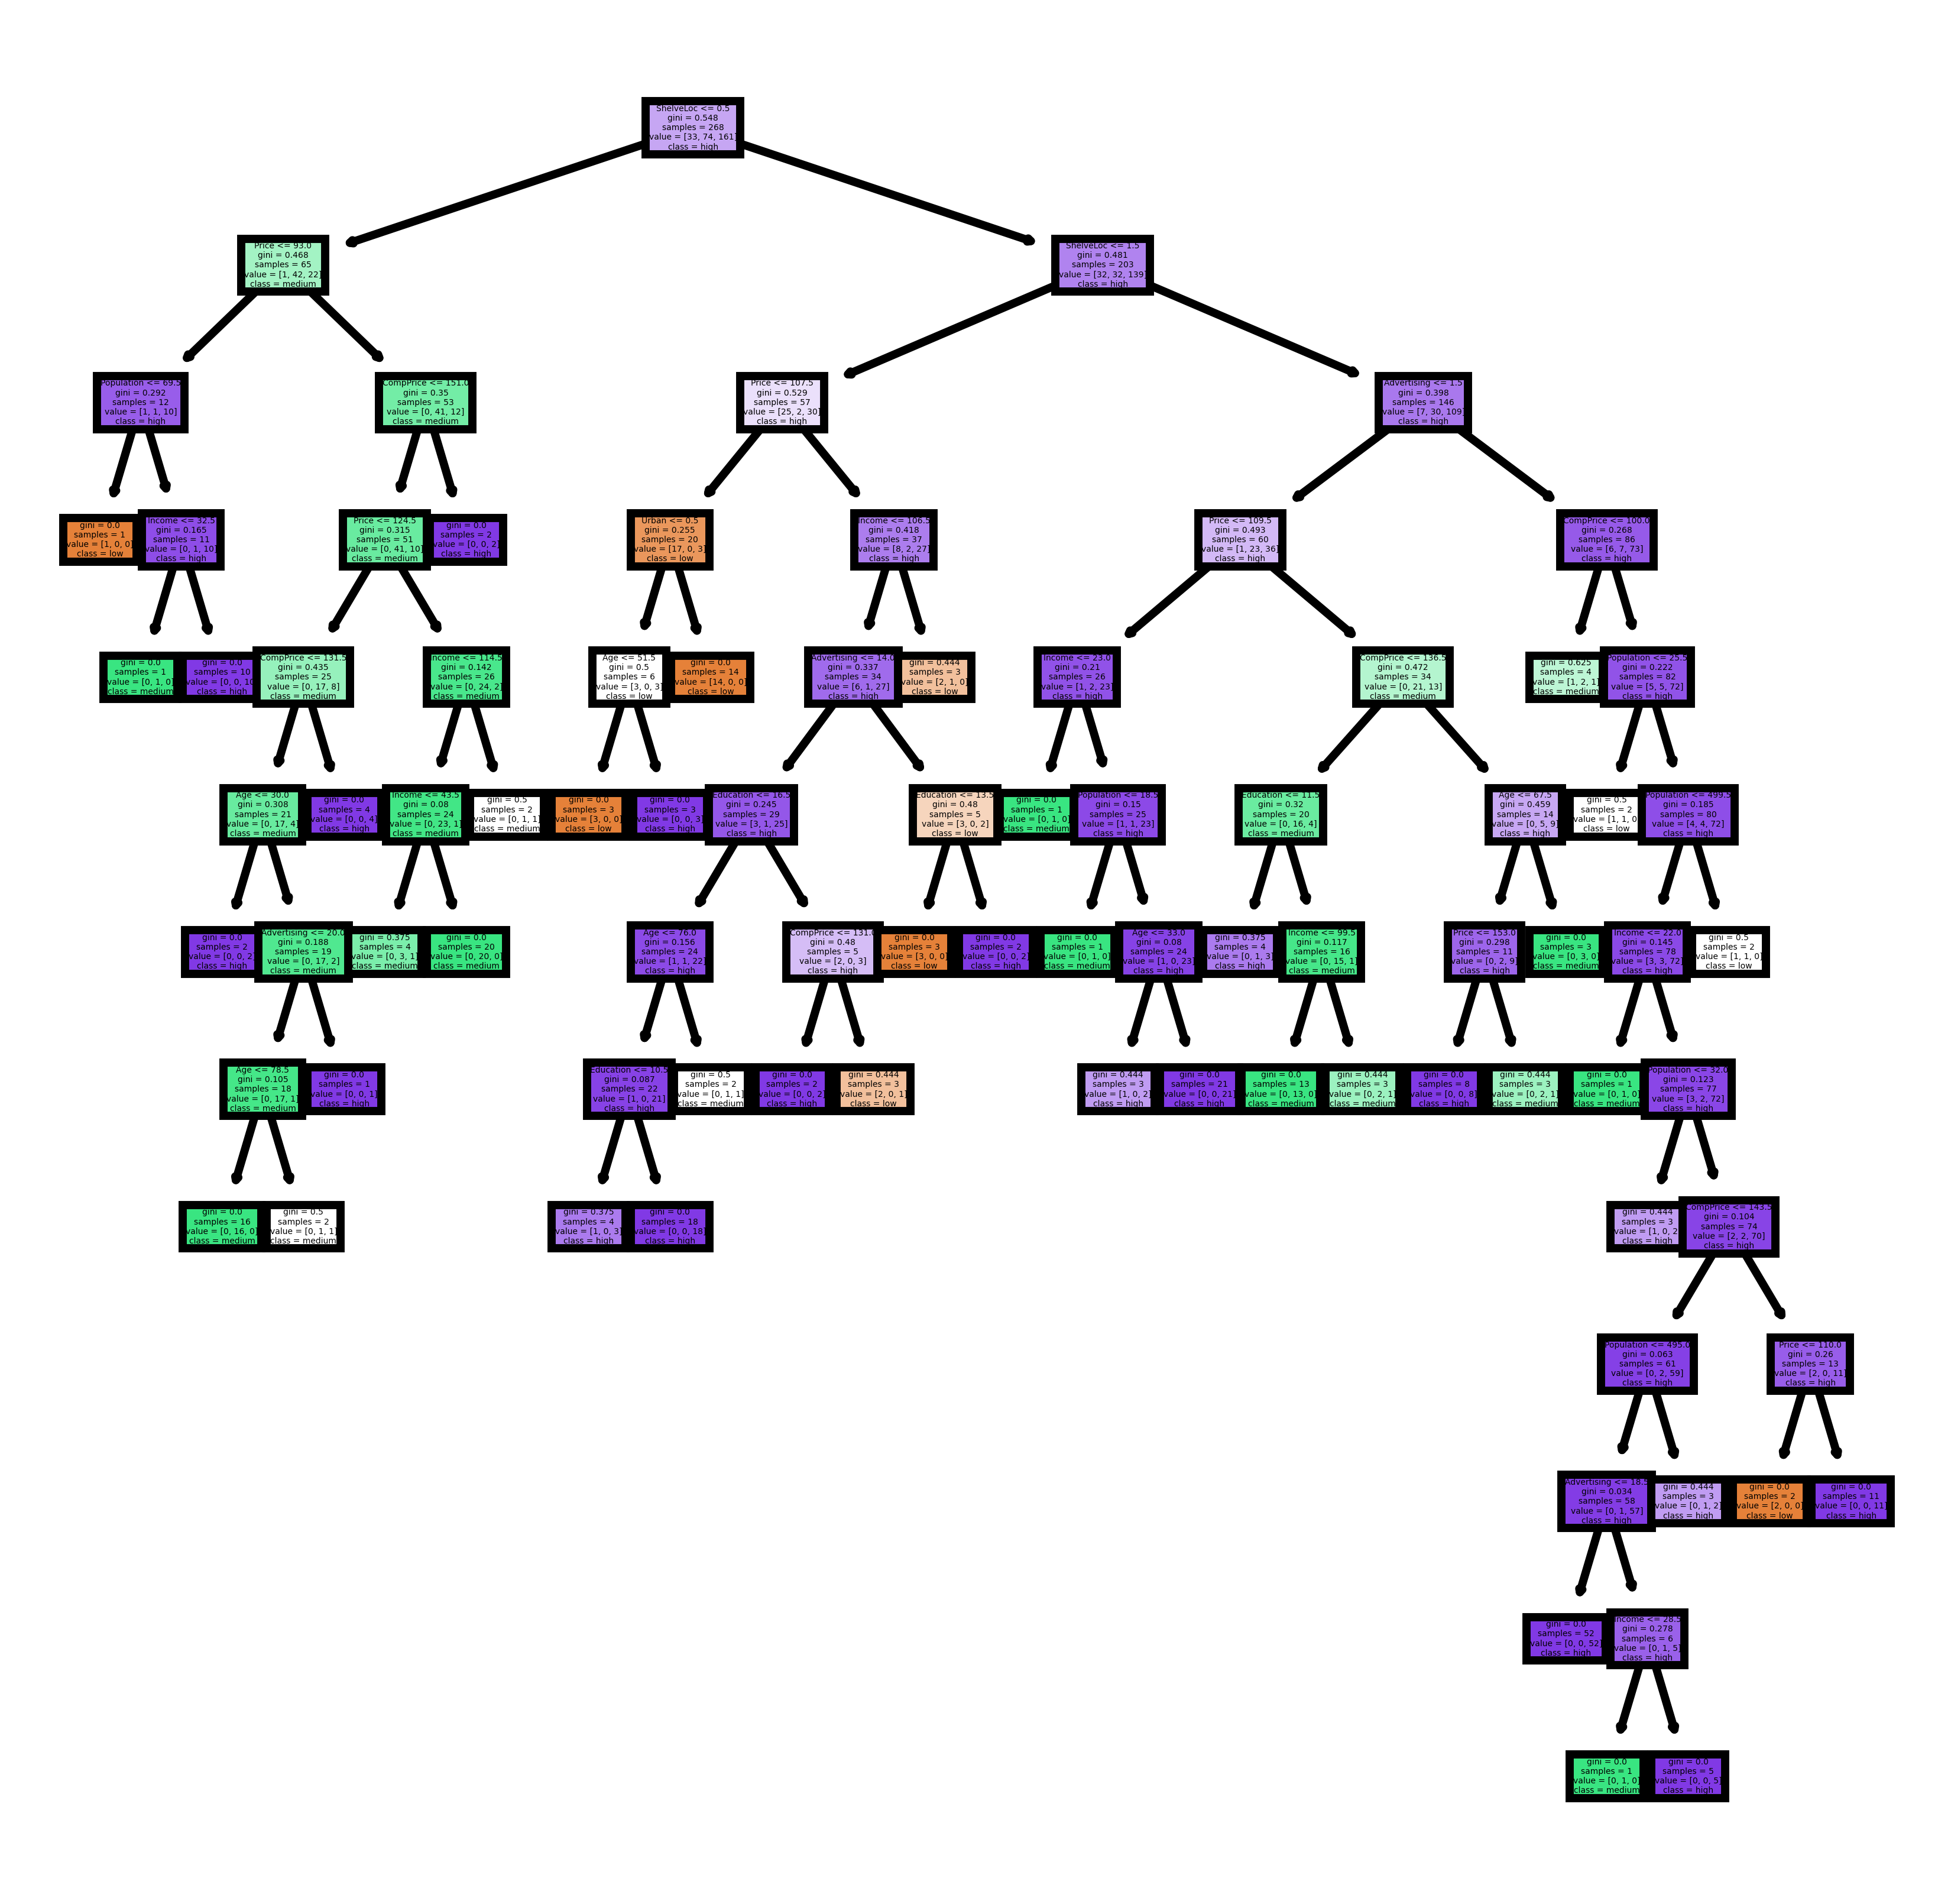

In [60]:
fn=['CompPrice','Income','Advertising','Population','Price','ShelveLoc','Age','Education','Urban','US']
cn=['low', 'medium', 'high']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=1000)
tree.plot_tree(first_model,
               feature_names = fn, 
               class_names=cn,
               filled = True);

# Accuracy

In [65]:
accuracy_score(pred_first,y_test)

0.6060606060606061

In [66]:
from sklearn.metrics import classification_report
print(classification_report(y_test,pred_first)) 

              precision    recall  f1-score   support

           0       0.38      0.28      0.32        18
           1       0.43      0.57      0.49        28
           2       0.72      0.69      0.70        86

    accuracy                           0.61       132
   macro avg       0.51      0.51      0.51       132
weighted avg       0.61      0.61      0.61       132



In [67]:
print(confusion_matrix(y_test,pred_first))

[[ 5  0 13]
 [ 2 16 10]
 [ 6 21 59]]


# Building Decision Tree Classifier using "entropy" Criteria

In [68]:
second_model=DecisionTreeClassifier(criterion='entropy',max_depth=10,min_samples_split=2)

In [69]:
second_model.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=10)

In [70]:
pred_second=second_model.predict(X_test)

In [71]:
pred_second

array([2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 2, 0, 2, 2, 2, 2, 1, 1, 2, 2, 1, 2,
       0, 1, 2, 1, 2, 2, 2, 1, 0, 2, 2, 2, 2, 1, 0, 2, 2, 2, 2, 1, 2, 2,
       2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 0, 2, 2, 2, 0, 1, 1, 1, 1, 1, 2,
       2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2,
       2, 2, 2, 2, 2, 0, 2, 2, 1, 1, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 1,
       1, 1, 1, 0, 2, 0, 1, 2, 2, 2, 0, 0, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1],
      dtype=int64)

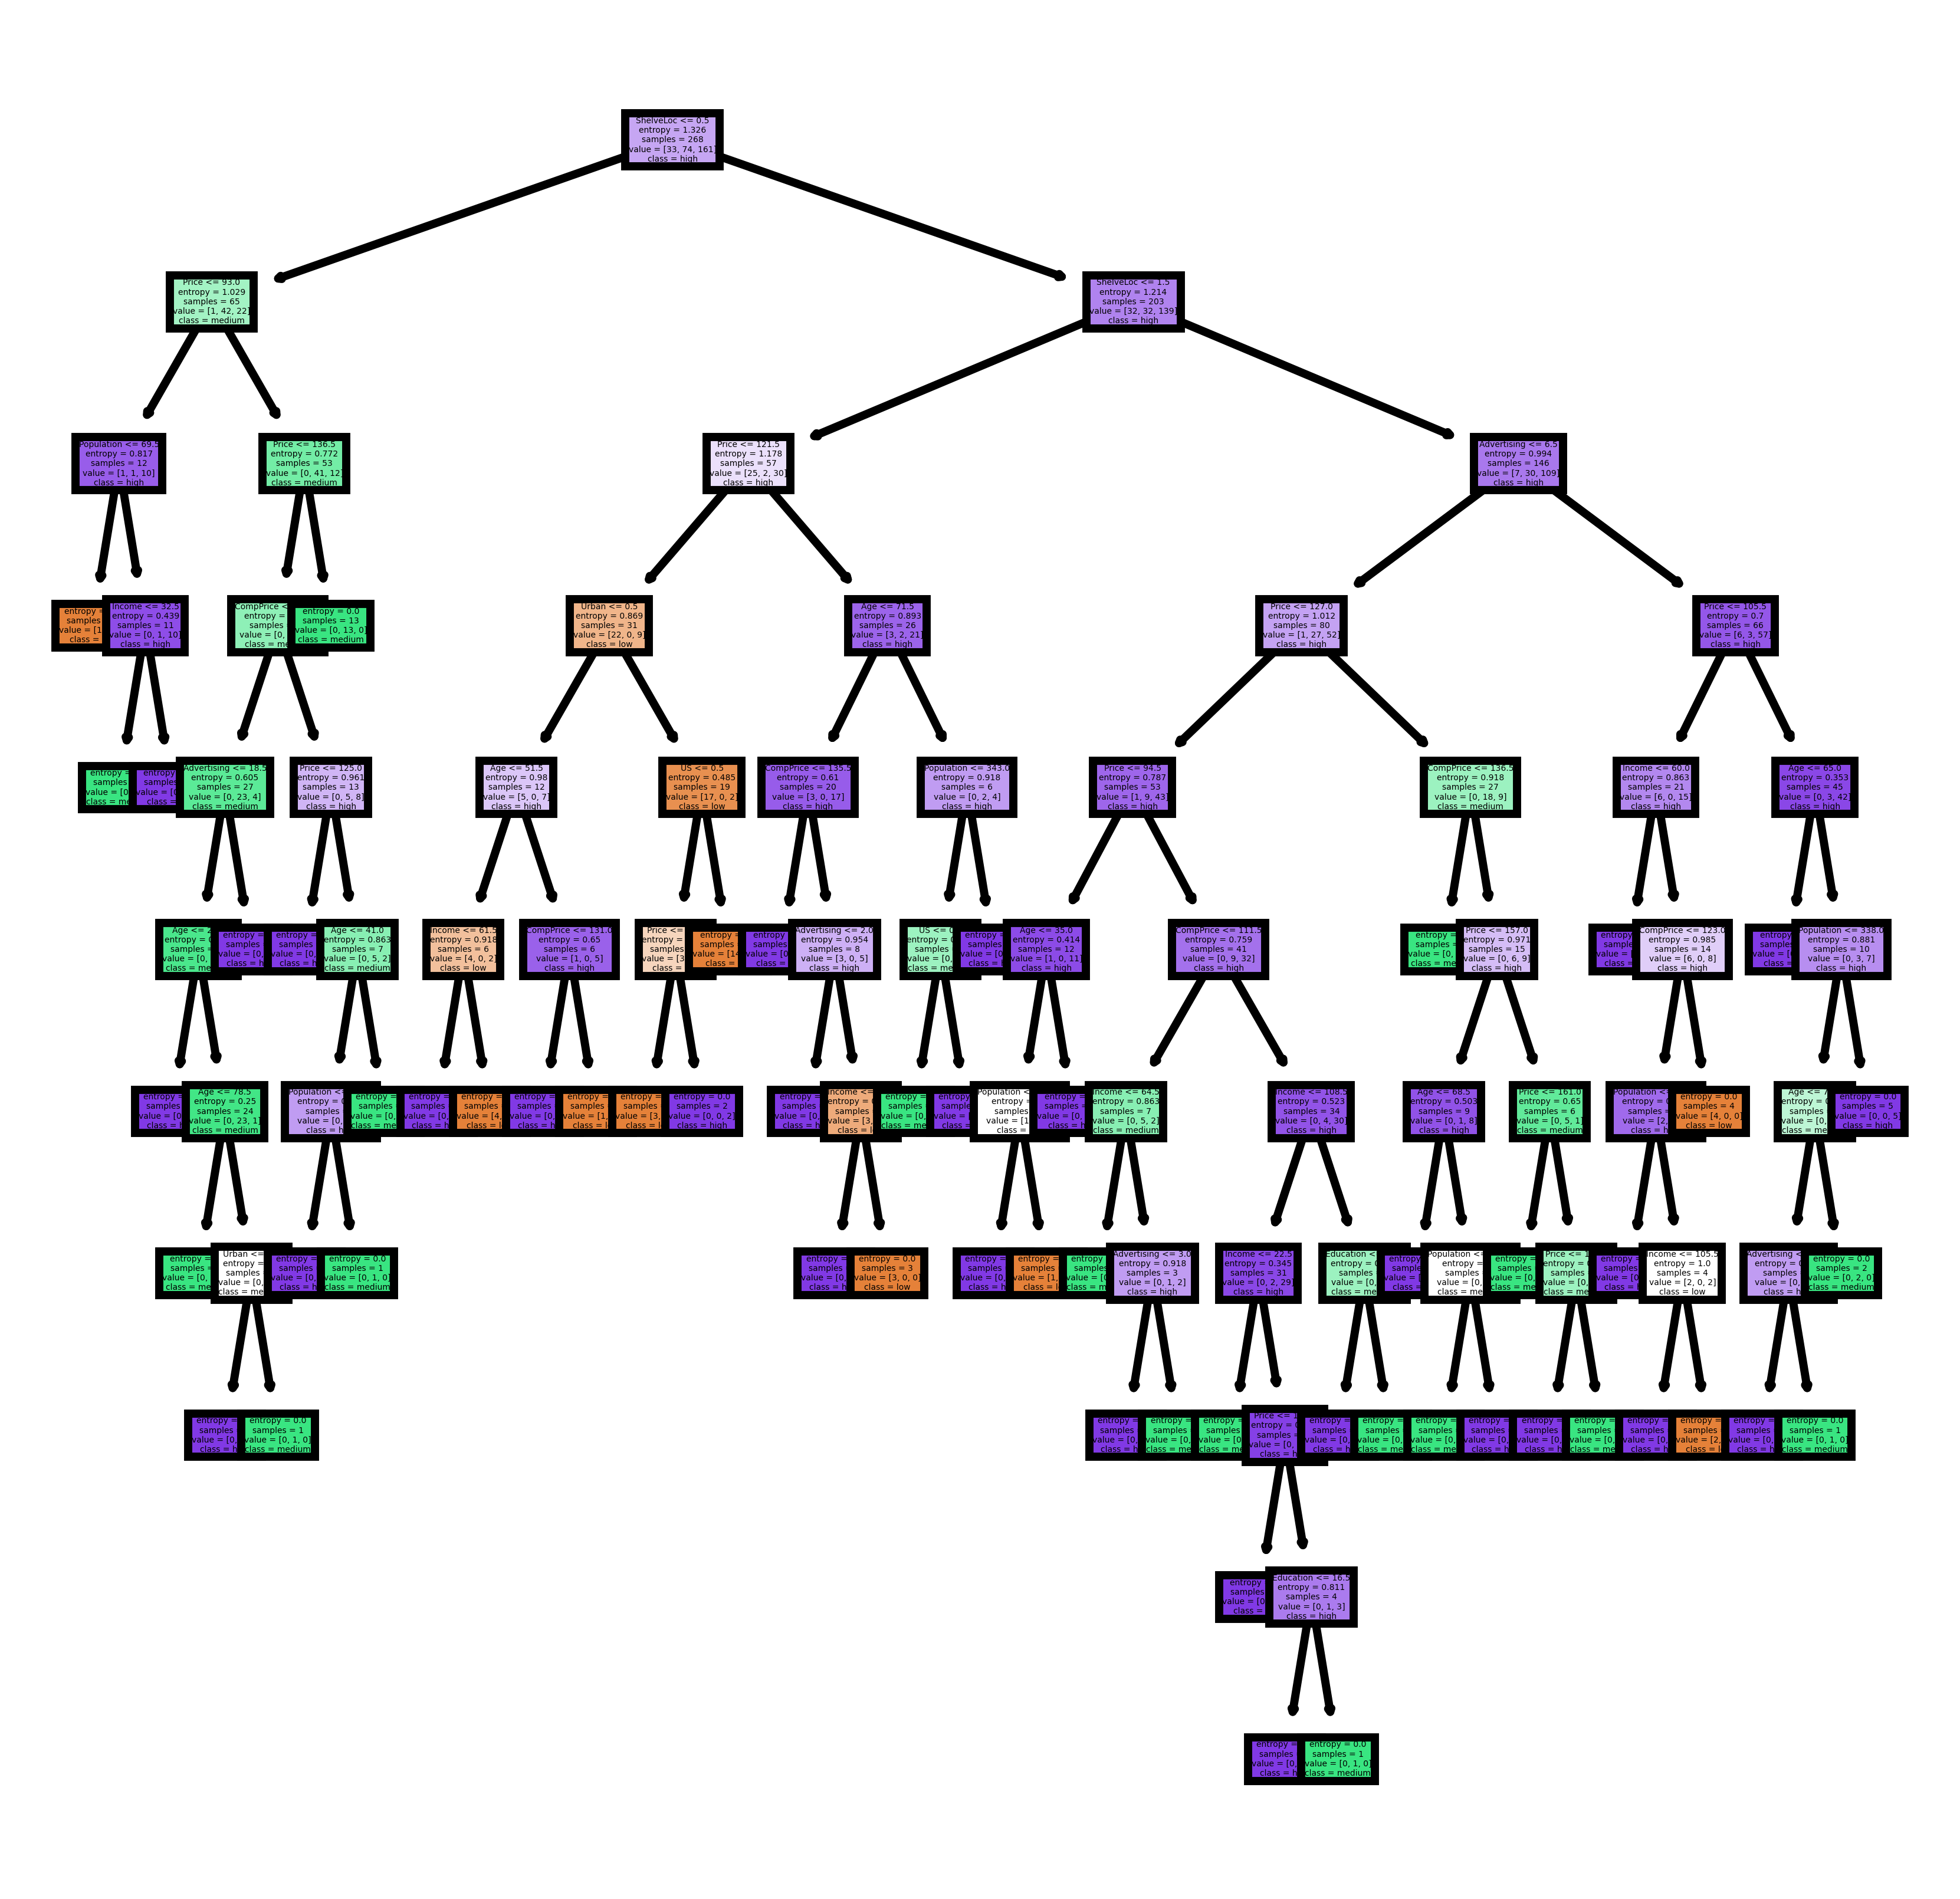

In [73]:
fn=['CompPrice','Income','Advertising','Population','Price','ShelveLoc','Age','Education','Urban','US']
cn=['low', 'medium', 'high']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=1000)
tree.plot_tree(second_model,
               feature_names = fn, 
               class_names=cn,
               filled = True);

# Accuracy

In [74]:
accuracy_score(pred_second,y_test)

0.6666666666666666

In [75]:
from sklearn.metrics import classification_report
print(classification_report(y_test,pred_second)) 

              precision    recall  f1-score   support

           0       0.55      0.33      0.41        18
           1       0.51      0.64      0.57        28
           2       0.74      0.74      0.74        86

    accuracy                           0.67       132
   macro avg       0.60      0.57      0.58       132
weighted avg       0.67      0.67      0.66       132



In [76]:
print(confusion_matrix(y_test,pred_second))

[[ 6  0 12]
 [ 0 18 10]
 [ 5 17 64]]


# From both Criteria  "entropy", gives maximum accuracy